In [1]:
import os
os.sys.path.append(os.path.join(os.getcwd(), "../.."))
import matplotlib.pyplot as plt
from databases.connector import Connector
from models.ExportFormat import ExportFormat

In [2]:
connector = Connector(ExportFormat.JSON)

In [3]:
questions_collection = connector.client.questions_collection

pipeline = [
    {"$group": {"_id": "$question_type", "count": {"$sum": 1}}}
]
result = questions_collection.aggregate(pipeline)

question_type_count = {}
total = 0

for item in result:
    question_type = item["_id"]
    count = item["count"]
    question_type_count[question_type] = count
    total += count

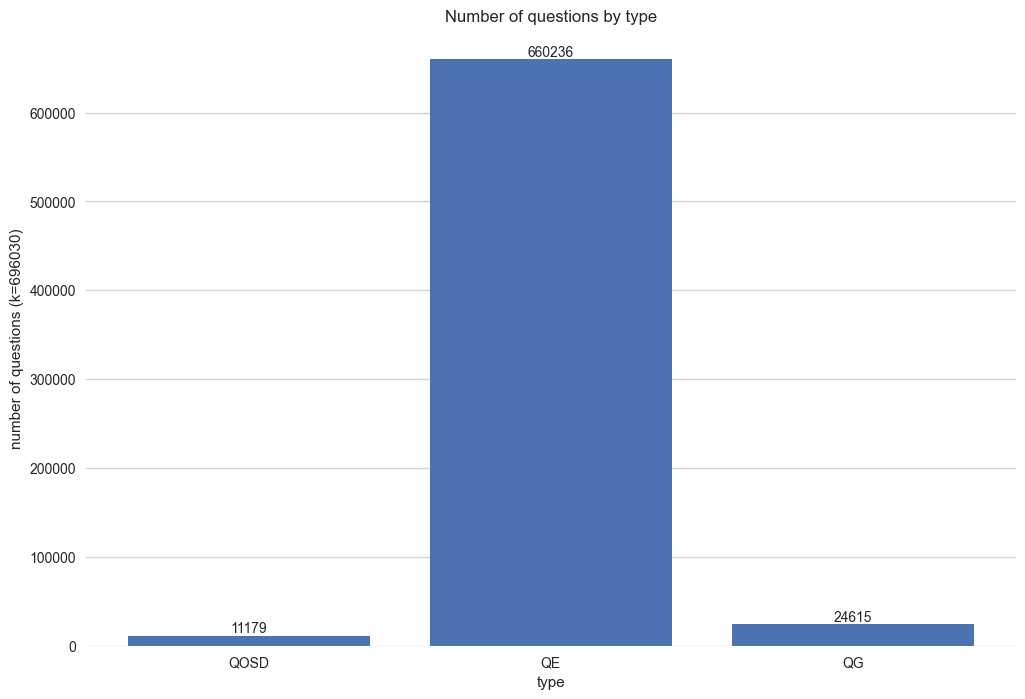

In [4]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 8))
plt.gca().set_facecolor((1.0, 1.0, 1.0))
plt.title('Number of questions by type')
plt.xlabel('type')
plt.ylabel(f'number of questions (k={total})')
plt.grid(axis="y", color="lightgrey")

bars = plt.bar(x=[x for x in question_type_count.keys()], height=question_type_count.values())

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.savefig('plot.png', dpi=300)
plt.show()